In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv('Supplement_Sales_Weekly_Expanded.csv')

# Basic information
print(df.info())
print(df.describe())
print(df.nunique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4384 entries, 0 to 4383
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            4384 non-null   object 
 1   Product Name    4384 non-null   object 
 2   Category        4384 non-null   object 
 3   Units Sold      4384 non-null   int64  
 4   Price           4384 non-null   float64
 5   Revenue         4384 non-null   float64
 6   Discount        4384 non-null   float64
 7   Units Returned  4384 non-null   int64  
 8   Location        4384 non-null   object 
 9   Platform        4384 non-null   object 
dtypes: float64(3), int64(2), object(5)
memory usage: 342.6+ KB
None
        Units Sold        Price       Revenue     Discount  Units Returned
count  4384.000000  4384.000000   4384.000000  4384.000000     4384.000000
mean    150.200274    34.781229   5226.569446     0.124398        1.531478
std      12.396099    14.198309   2192.491946     0.071792 

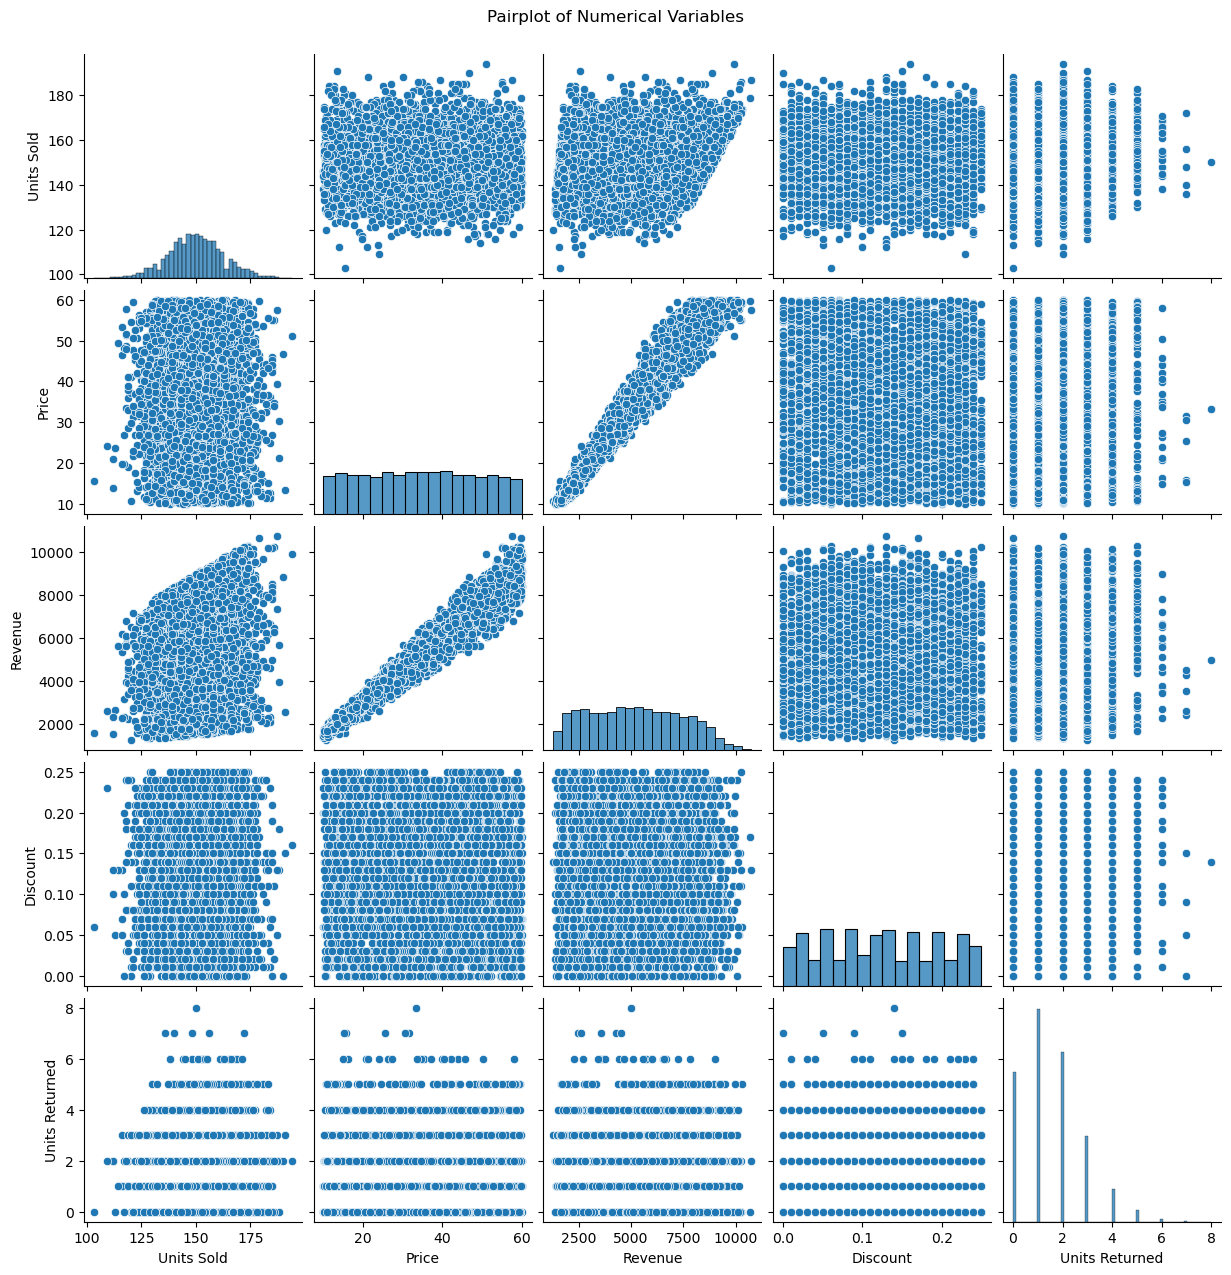

In [3]:
sns.pairplot(df[['Units Sold', 'Price', 'Revenue', 'Discount', 'Units Returned']])
plt.suptitle('Pairplot of Numerical Variables', y=1.02)
plt.show()

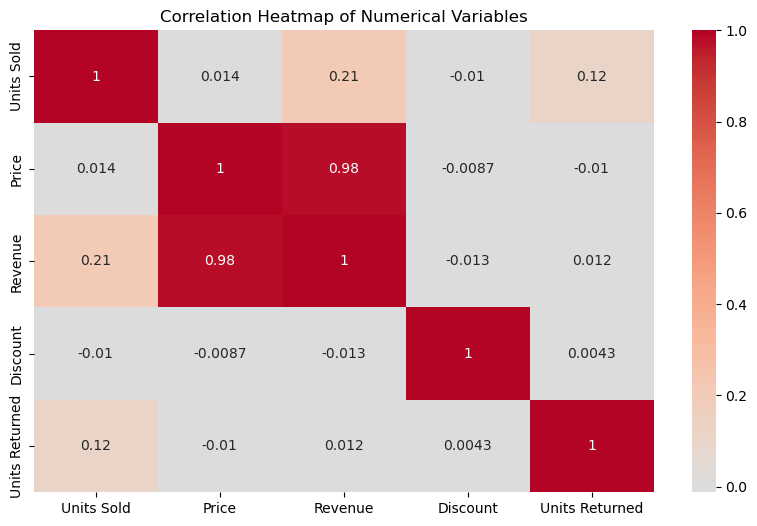

In [5]:
plt.figure(figsize=(10,6))
sns.heatmap(df[['Units Sold', 'Price', 'Revenue', 'Discount', 'Units Returned']].corr(), 
            annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap of Numerical Variables')
plt.show()

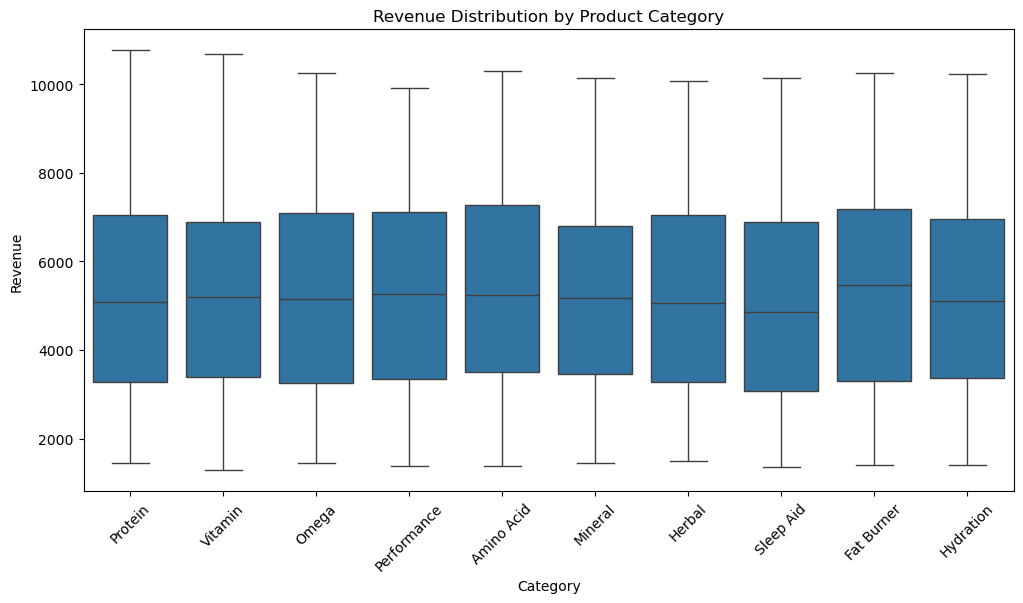

In [7]:
plt.figure(figsize=(12,6))
sns.boxplot(x='Category', y='Revenue', data=df)
plt.title('Revenue Distribution by Product Category')
plt.xticks(rotation=45)
plt.show()

C:\Users\rajan\AppData\Local\Temp\ipykernel_7148\60974814.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_revenue = df.groupby(pd.Grouper(key='Date', freq='M'))['Revenue'].sum()


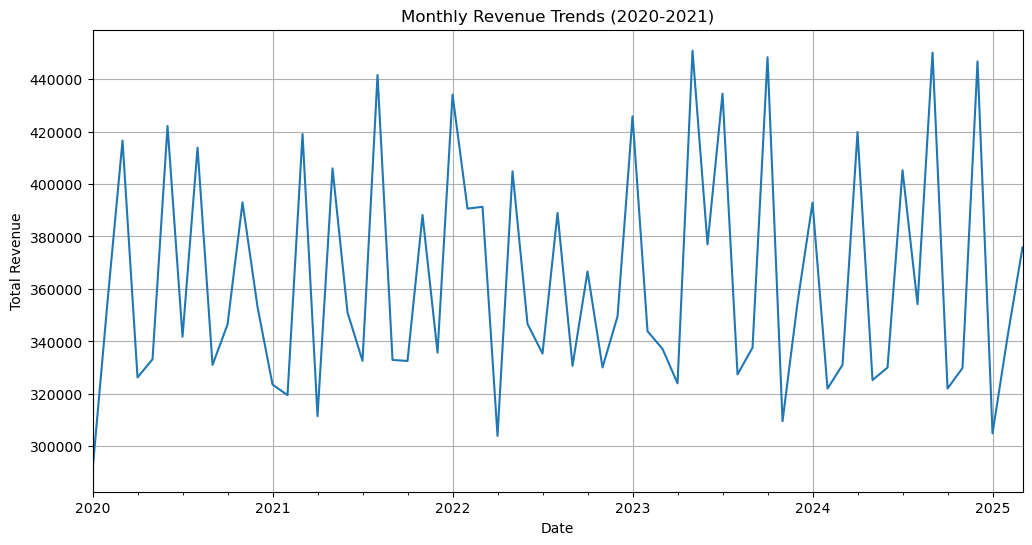

In [9]:
df['Date'] = pd.to_datetime(df['Date'])
monthly_revenue = df.groupby(pd.Grouper(key='Date', freq='M'))['Revenue'].sum()

plt.figure(figsize=(12,6))
monthly_revenue.plot()
plt.title('Monthly Revenue Trends (2020-2021)')
plt.ylabel('Total Revenue')
plt.xlabel('Date')
plt.grid()
plt.show()

C:\Users\rajan\AppData\Local\Temp\ipykernel_7148\1365183877.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Platform', y='Revenue', data=df, estimator=sum, ci=None)


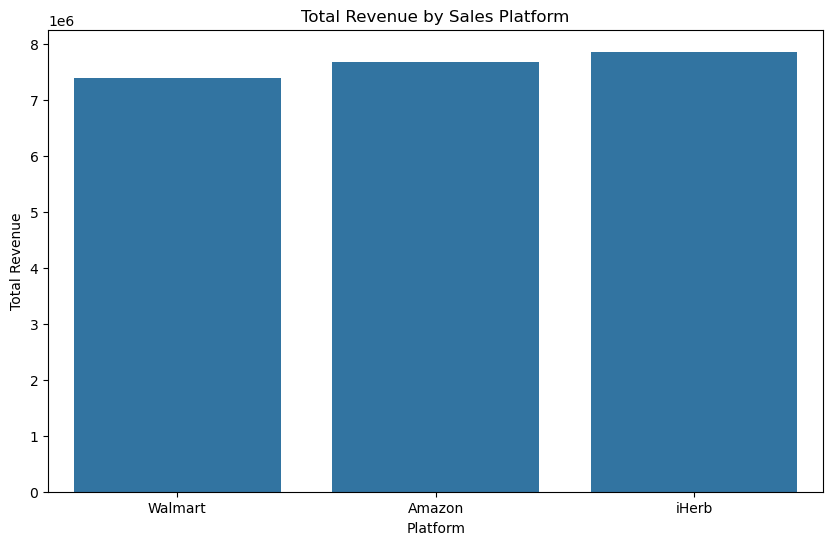

In [11]:
plt.figure(figsize=(10,6))
sns.barplot(x='Platform', y='Revenue', data=df, estimator=sum, ci=None)
plt.title('Total Revenue by Sales Platform')
plt.ylabel('Total Revenue')
plt.show()

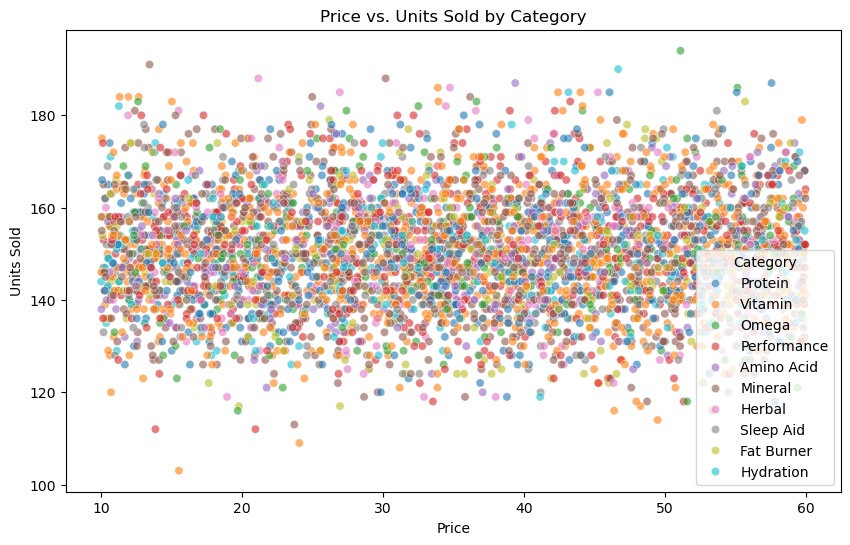

In [13]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='Price', y='Units Sold', hue='Category', data=df, alpha=0.6)
plt.title('Price vs. Units Sold by Category')
plt.show()